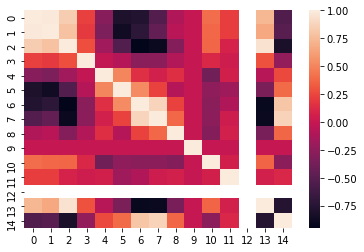

In [63]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.decomposition import PCA
import numpy as np
from sklearn.metrics import roc_auc_score,f1_score
X=pd.read_csv('X_fits_max_from_wavlet.csv',index_col=0)
X_test=pd.read_csv('X_test_fits_max_from_wavlet.csv',index_col=0)
sns.heatmap(X.corr())

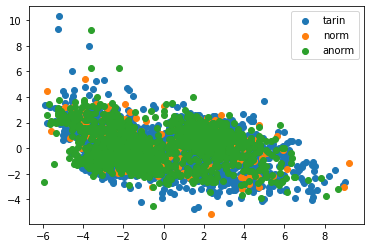

0.5409957627118643


In [77]:
# X=X.replace([np.inf, -np.inf], 0)
sc=StandardScaler()
sc.fit(X)
X=sc.transform(X)
# X_test=X_test.replace([np.inf, -np.inf], 0)
X_test=sc.transform(X_test)
# print(X)
# print(X_test)
pca = PCA(n_components=3)
fit = pca.fit(X)
features = fit.transform(X)
features_test=fit.transform(X_test)
df=pd.read_csv('y_test_std.csv',index_col=0)
# print(df.head())
y_test=df.to_numpy()[:,0]
y_test[y_test == 1] = 1
y_test[y_test == 0] = -1
arg1=np.argwhere(y_test==1)
arga1=np.argwhere(y_test==-1)
plt.figure()
plt.scatter(features[:,0],features[:,1],label='tarin')
plt.scatter(features_test[arg1,0],features_test[arg1,1],label='norm')
plt.scatter(features_test[arga1,0],features_test[arga1,1],label='anorm')
plt.legend()
plt.show()
model=OneClassSVM()
# grid = GridSearchCV(model, param_grid={}, cv=5)
# resg=grid.fit(X,y)
estim=model.fit(features)
res=estim.predict(features_test)

print(roc_auc_score(y_test,res))

In [73]:
df=pd.read_csv('y_test_std.csv',index_col=0)
print(df.head())
y_test=df.to_numpy()[:,0]
print(y_test,res)

y_test[y_test == 1] = 1
y_test[y_test == 0] = -1
print(roc_auc_score(y_test,res))

     0
0  0.0
1  0.0
2  0.0
3  0.0
4  0.0
[0. 0. 0. ... 1. 1. 1.] [ 1 -1  1 ...  1  1 -1]
0.5338347457627118


In [34]:
print(f1_score(y_test,res))

0.342062193126023
